### 1. 속성데이터와 레이블데이터로 분리

In [408]:
import numpy as np
import csv
with open('C:/titanic.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header = np.array(next(reader))
    
    X,y = [],[]
    for row in reader:
        X.append(row)
        y.append(row[2])
        
    X = np.array(X)
    y = np.array(y)

In [409]:
print(header)

['id' 'pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket'
 'fare' 'cabin' 'embarked']


### 2. 학습에 사용할 자질 선택

In [410]:
X1 = X[:, [1,4,5]]
X2 = X[:, [1,4,5,6,7]]
feature_names1 = header[[1,4,5]]
feature_names2 = header[[1,4,5,6,7]]

In [411]:
print(feature_names1)

['pclass' 'sex' 'age']


### 3. 데이터 전처리

In [412]:
ages = X1[:, 2]
mean_age =  np.mean(X1[ages!='', 2].astype(np.float))
X1[ X1[:,2]=='', 2 ] = mean_age

In [413]:
ages = X2[:, 2]
mean_age =  np.mean(X2[ages!='', 2].astype(np.float))
X2[ X2[:,2]=='', 2 ] = mean_age

In [414]:
#여자:0 남자:1
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(X1[:, 1])
X1[:, 1] = label_encoder.transform(X1[:, 1])

In [415]:
#여자:0 남자:1
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(X2[:, 1])
X2[:, 1] = label_encoder.transform(X2[:, 1])

### 4. 학습/평가 데이터 분리

In [431]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.5, random_state=30)

In [432]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.5, random_state=30)

In [418]:
print(len(X1_train), len(y_train))
print(len(X1_test), len(y_test))

445 445
445 445


In [433]:
#['0' '1']->[[1,0],[0,1]]로 변환

def tranfer(y):
    y2=[]
    for i in range(len(y)):
        if(y[i]=='0'):
            y2.append([1,0])
        else:
            y2.append([0,1])
    return np.array(y2)

y1_test=tranfer(y1_test)
y2_test=tranfer(y2_test)

### 학습

In [439]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5) #DecisionTree
clf = clf.fit(X_train, y_train)
y_score=(clf.predict_proba(X_test))

In [444]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])   


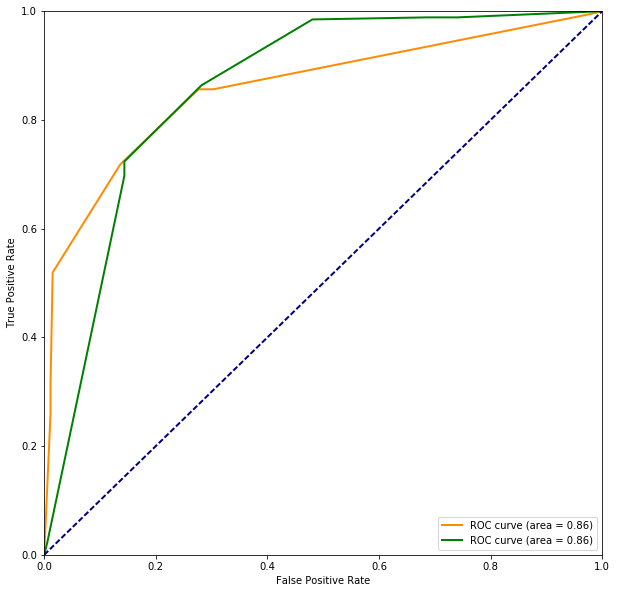

In [453]:
import matplotlib.pyplot as plt

lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1]) #생존자기준
plt.plot(fpr[0], tpr[0], color='green', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0]) #사망자기준
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [22]:
with open("./mytree.dot", 'w') as  f:
    dot_data=tree.export_graphviz(clf, out_file=f, feature_names=feature_names)

!dot -Tpng C:/Users/Public/Videos/mytree.dot -o C:/Users/Public/Videos/mytree.png


![Alt text](./mytree.png)

### - Evaluation
* 성능평가
* 교차검증

In [297]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

ValueError: Mix type of y not allowed, got types {'multilabel-indicator', 'binary'}

In [24]:
from sklearn.cross_validation import cross_val_score

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
acc = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(acc)

[ 0.82222222  0.82222222  0.7752809   0.87640449  0.82022472  0.76404494
  0.7752809   0.76404494  0.82954545  0.78409091]


## 1번문제

In [44]:
import numpy as np
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

with open('C:/tennis.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header = np.array(next(reader))
    
    X,y = [],[]
    for row in reader:
        X.append(row[1:-1])
        y.append(row[-1])
        
    X = np.array(X)
    y = np.array(y)
#['Overcast', 'Rain', 'Sunny', 'Cool', 'Hot', 'Mild','humidity','wind']
feature_names = []

enc = LabelEncoder()

for i in range(4):   
    label_encoder = enc.fit(X[:, i])   
    if(label_encoder.classes_.size>2):
         feature_names.append(label_encoder.classes_)
    else:
        feature_names.append(header[[i+1]])
    X[:, i] = label_encoder.transform(X[:, i])

feature_names=reduce(lambda x,y :x+y ,map(list,feature_names))

label_encoder = enc.fit(y)
y = label_encoder.transform(y)

enc=OneHotEncoder()
enc.fit(X)

X_new=enc.transform(X).toarray()[:,range(6)]

X_new=X_new[:,range(0,6)]
X_new=X_new.astype(int)
X=X.astype(int)
X=X[:,range(2,4)]

X=np.concatenate((X_new,X), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1)
clf = clf.fit(X_train, y_train)

with open("C:\Users\Public\Videos/mytree1.dot", 'w') as  f:
    dot_data=tree.export_graphviz(clf, out_file=f, feature_names=feature_names)

!dot -Tpng C:/Users/Public/Videos/mytree1.dot -o C:/Users/Public/Videos/mytree1.png
        



## 2번문제

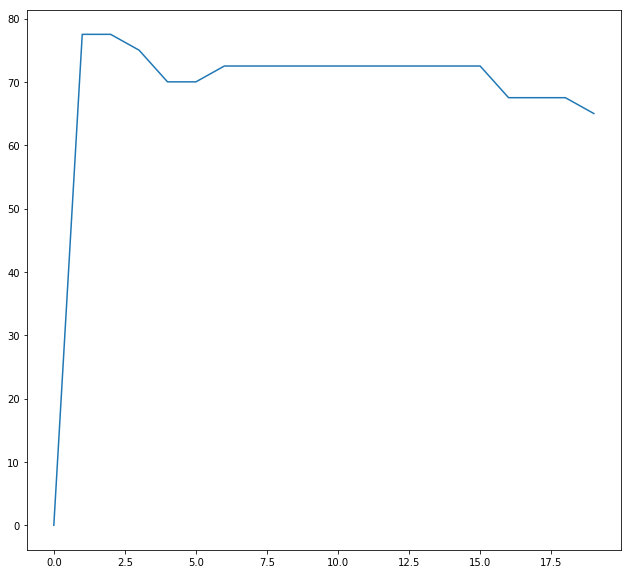

In [26]:
import numpy as np
import pylab as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import math
import operator

f=open("C:/german-symbolic.txt")

data=list([i for i in line.splitlines()]for line in f)

def normal(list):
    M=max(list)
    m=min(list)
    for i in range(200):
        list[i]=(list[i]-m)/(M-m)
    return list
              
def change(list):    
    for i in range(200):
        list[i]=(list[i])[-2:]
    return list
 
# feature matrix를 "X"에 저장
X = [data[i][0][:] for i in range(200)]

X=np.array(list((X[i]).split(" ") for i in range (200)))

for i in range(20):
    if(X[:,i][i].startswith('A')):
        for j in range(200):
            X[:,i][j]=int((X[:,i][j])[-1:])
                    
X_train, X_test= train_test_split(X, test_size=0.2, random_state=33)

def euclideanDistance(instance1, instance2, length):
    distance = 0
    instance1.astype(float)
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)      
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


def getResponse(neighbors):
    count = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in count:
            count[response] += 1
        else:
            count[response] = 1
    result = sorted(count.iteritems(), key=operator.itemgetter(1), reverse=True)
    return result[0][0]


def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

    
X_train=X_train.astype(float)
X_test=X_test.astype(float)


plt.subplots_adjust(left=None, bottom=None, right=1.5, top=2, wspace=None, hspace=0.3) 

k=range(20)

for i in range(1,20):
    predictions=[] 
    for x in range(len(X_test)):   
        neighbors = getNeighbors(X_train, X_test[x], i)
        result = getResponse(neighbors)
        predictions.append(result)  
    accuracy = getAccuracy(X_test, predictions)
    k[i]=accuracy

plt.plot(k)
plt.show()